<a href="https://colab.research.google.com/github/Mirayulia2707/Dataset4/blob/main/SC60307_Mira_Yulia_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Science Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Model
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load


# Ignore Warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Mirayulia2707/Health-Case-Study/main/heart.csv", sep = ",")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# K MEANS

Alasan saya memilih K-Means pada penggunaan machinne learning model tersebut ialah:

1. Tidak Ada Label Yang Diketahui:
Algoritma K-Means cocok untuk data tanpa label yang jelas atau tidak memiliki target klasifikasi yang sudah ditentukan. Dalam hal ini, tampaknya tidak ada kolom yang secara eksplisit menunjukkan label penyakit jantung.

 2. Segmentasi Data: K-Means sering digunakan untuk mengelompokkan data menjadi kelompok-kelompok yang berbeda berdasarkan pola yang ada dalam atribut-atribut yang tersedia. Dalam kasus ini, mungkin Anda ingin mengelompokkan pasien berdasarkan profil kesehatan mereka untuk mengidentifikasi pola yang berbeda dalam gejala dan faktor risiko yang mungkin terkait dengan penyakit jantung.

 3. Analisis Cluster: Dengan mengelompokkan data menggunakan K-Means, Anda dapat melakukan analisis lebih lanjut terhadap setiap cluster untuk memahami karakteristiknya. Misalnya, Anda dapat melihat apakah ada perbedaan signifikan dalam profil kesehatan antara kelompok-kelompok tersebut dan kemudian menarik kesimpulan tentang faktor-faktor risiko yang mungkin berkontribusi terhadap penyakit jantung.

In [ ]:
from sklearn.cluster import KMeans

X_numerics = data[['age', 'cp', 'chol']] # subset with numeric variables only
X_numerics.head()

,age,cp,chol
0,52,0,212
1,53,0,203
2,70,0,174
3,61,0,203
4,62,0,294


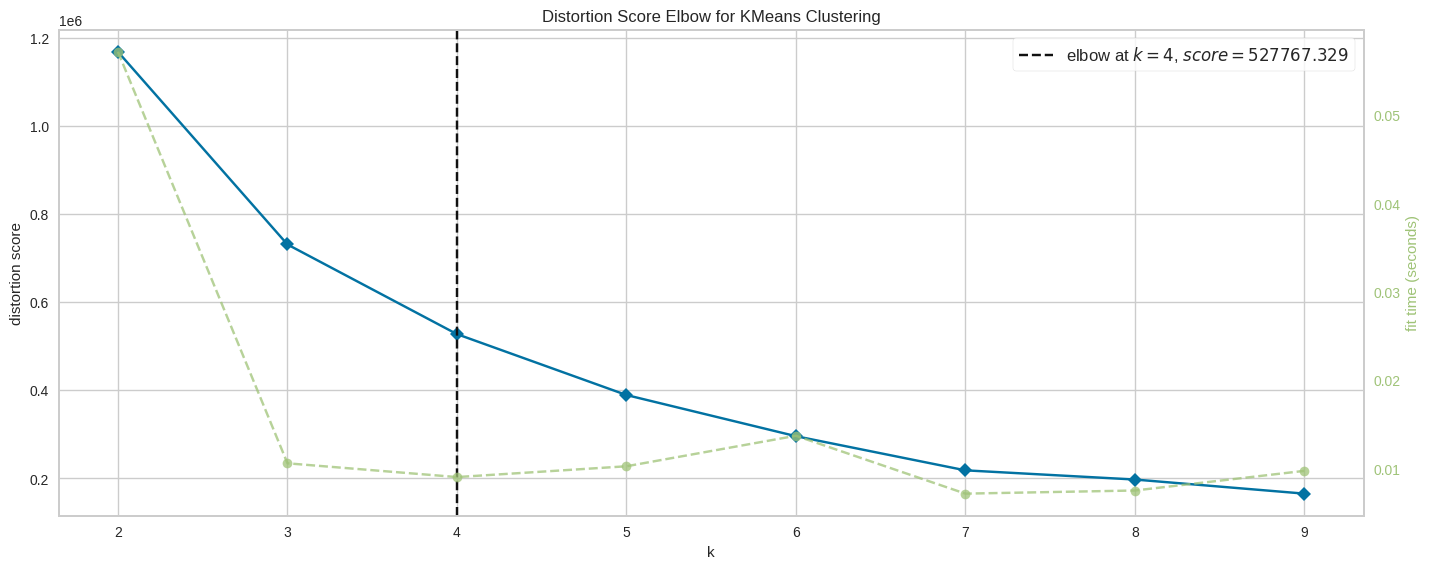

In [ ]:
# @title
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1, n_init="auto")
visualizer = KElbowVisualizer(model, k=(2,10))

plt.figure(figsize=(15,6))
visualizer.fit(X_numerics)
visualizer.show()
plt.show()


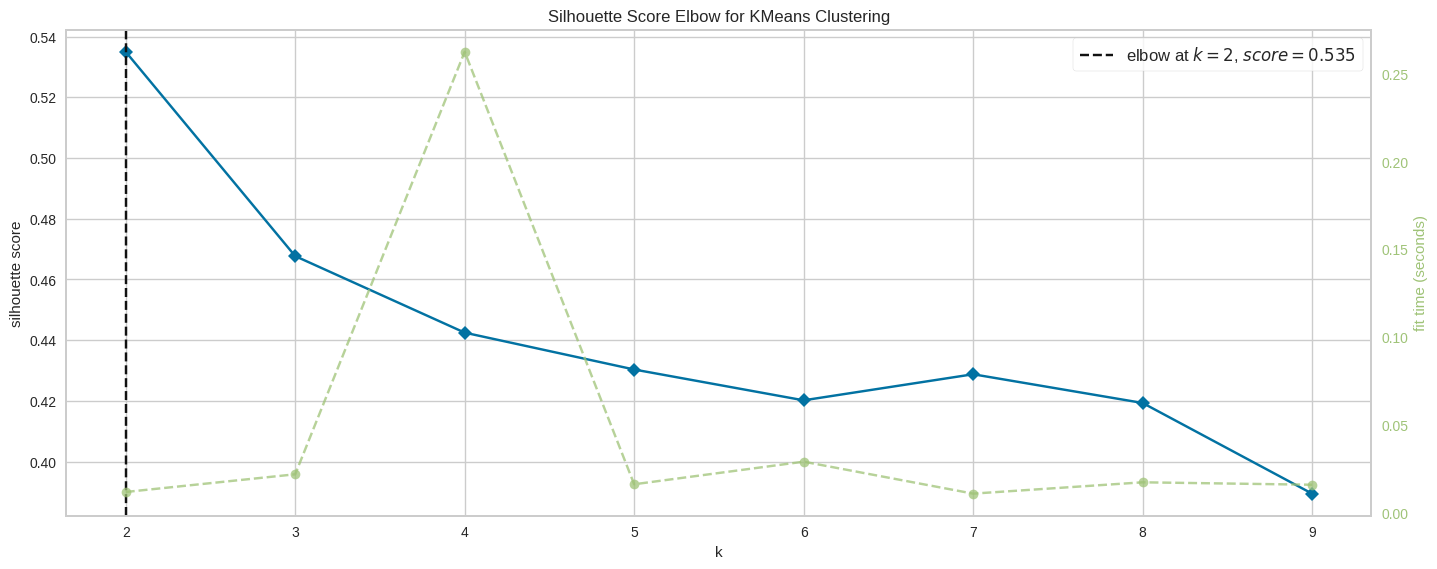

In [ ]:
# @title
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1, n_init="auto")
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

plt.figure(figsize=(15,6))
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [ ]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points
KM5_clustered.head()

,age,cp,chol,Cluster
0,52,0,212,2
1,53,0,203,1
2,70,0,174,1
3,61,0,203,1
4,62,0,294,0


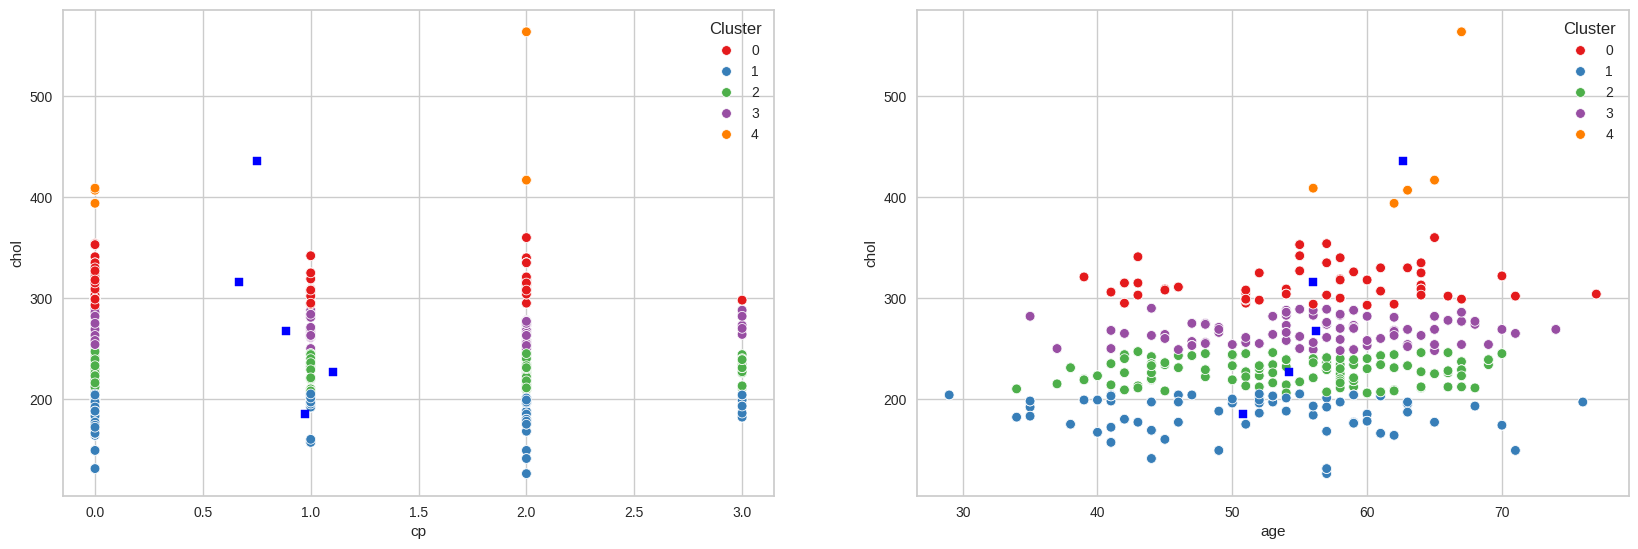

In [ ]:
# @title
fig1, (axes) = plt.subplots(1,2,figsize=(18,6))


scat_1 = sns.scatterplot(x='cp', y='chol', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='age', y='chol', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [ ]:
# @title
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,163
1,221
2,354
3,271
4,16


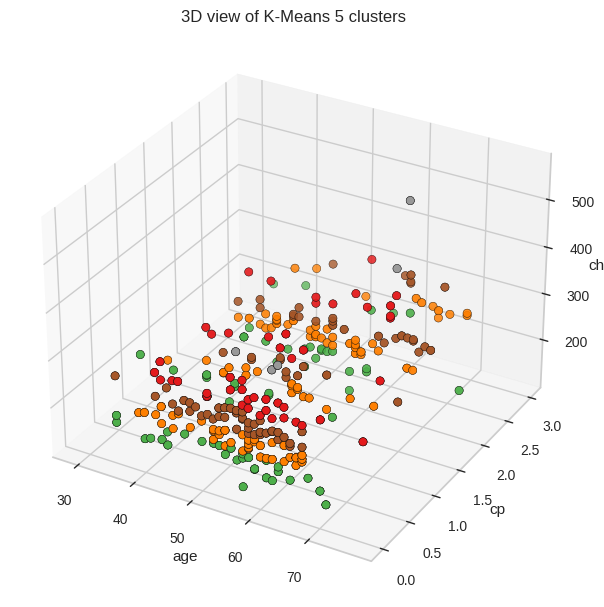

In [ ]:
# @title
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(KM5_clustered['age'],
           KM5_clustered['cp'],
           KM5_clustered['chol'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.set_xlabel('age')
ax.set_ylabel('cp')
ax.set_zlabel('chol')
ax.set_title('3D view of K-Means 5 clusters')

plt.show()

In [ ]:
# @title
import plotly.graph_objs as go
import plotly.io as pio

# Assuming KM5_clustered contains the clustered data

trace = go.Scatter3d(
    x=KM5_clustered['age'],
    y=KM5_clustered['cp'],
    z=KM5_clustered['chol'],
    mode='markers',
    marker=dict(
        size=5,
        color=KM5_clustered['Cluster'],
        colorscale='Jet',  # Change colorscale to 'Jet' or any other valid colorscale
        line=dict(
            width=0.5,
            color='black'
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title='age'),
        yaxis=dict(title='cp'),
        zaxis=dict(title='chol')
    ),
    title='3D view of K-Means 5 clusters'
)

fig = go.Figure(data=[trace], layout=layout)

pio.show(fig, renderer='colab')

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmModel = KMeans(n_clusters = i, n_init=10)
    kmModel.fit(data)
    wcss.append(kmModel.inertia_)

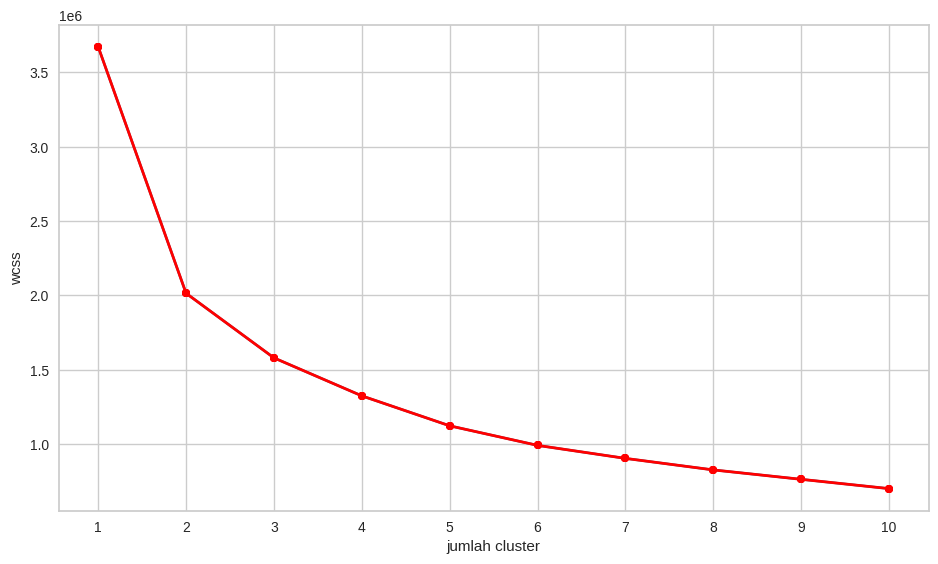

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color ="red",marker="8")
plt.xlabel("jumlah cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("wcss")
plt.show()

In [ ]:
kmModelfix = KMeans(n_clusters= 5)
kmModelfix.fit(data)

KMeans(n_clusters=5)

# Learning curves

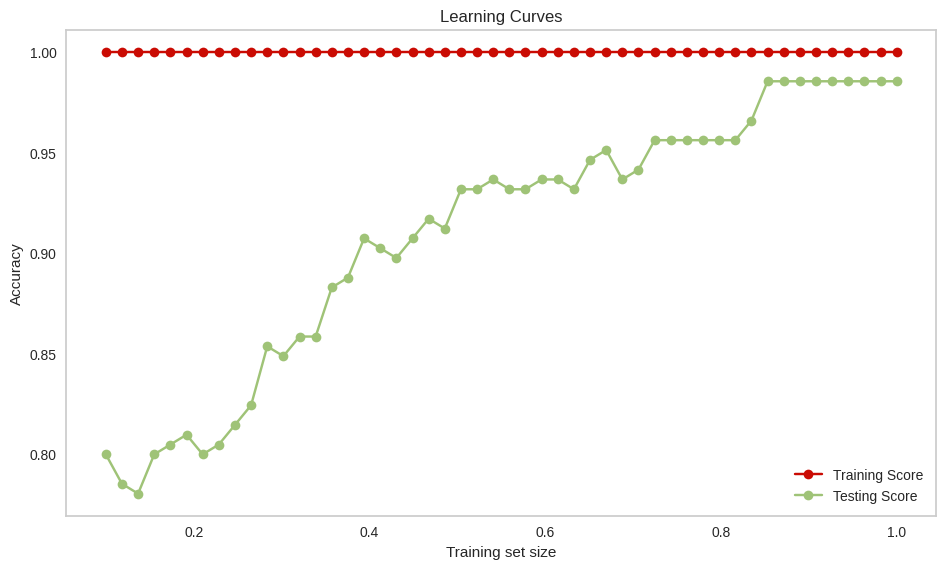

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is stored in a pandas DataFrame called 'df'
X, y = data.drop('target', axis=1), data['target']

# Split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Used to divide
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

clf = RandomForestClassifier(n_estimators=100, random_state=42)

for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = clf.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()


# Implementasi Cross Validation pada Model

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X, y = data.drop('target', axis=1), data['target']

clf = DecisionTreeClassifier(random_state=0)

cv_score = cross_val_score(clf, X, y, cv=10)
print(cv_score)

# Predict using cross-validation
y_pred = cross_val_predict(clf, X, y, cv=3)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X, y = data.drop('target', axis=1), data['target']

clf = DecisionTreeClassifier(random_state=0)
cv_score = cross_val_score(clf, X, y, cv=10)
print("Mean CV accuracy:", cv_score.mean())

Mean CV accuracy: 1.0


##hasil dari cross-validation basic:
Kode diatas melakukan validasi silang pada pengklasifikasi pohon keputusan menggunakan cross_val_scorefungsi dari scikit-learn. Validasi silang adalah teknik yang digunakan untuk mengevaluasi performa model pembelajaran mesin dengan membagi data menjadi beberapa bagian dan melatih serta menguji model di setiap bagian.

Output dari cross_val_scorefungsi ini adalah serangkaian skor untuk setiap lipatan. Dalam hal ini, outputnya adalah [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], yang menunjukkan bahwa pengklasifikasi pohon keputusan mencapai skor sempurna 1,0 untuk setiap lipatan.

Untuk mendapatkan ukuran kinerja model yang lebih informatif, kita dapat menghitung rata-rata skor validasi silang menggunakan CV_score.mean(). Outputnya adalah 1.0, yang menunjukkan bahwa pengklasifikasi pohon keputusan mencapai rata-rata akurasi validasi silang sebesar 100%.

Namun,skor validasi silang yang sempurna tidak selalu menunjukkan model yang baik. Overfitting juga dapat menghasilkan skor validasi silang yang tinggi, terutama jika jumlah lipatannya sedikit. Dalam hal ini, penting juga untuk mengevaluasi model pada set pengujian yang telah dilakukan untuk memastikan bahwa model tersebut dapat digeneralisasi dengan baik pada data baru.

Secara keseluruhan, hasil validasi silang menunjukkan bahwa pengklasifikasi pohon keputusan memiliki kinerja yang baik pada data pelatihan. Namun, evaluasi lebih lanjut pada set pengujian diperlukan untuk memastikan bahwa model dapat digeneralisasikan dengan baik pada data baru.

# Menampilkan Learning Curve dengan Cross Validation

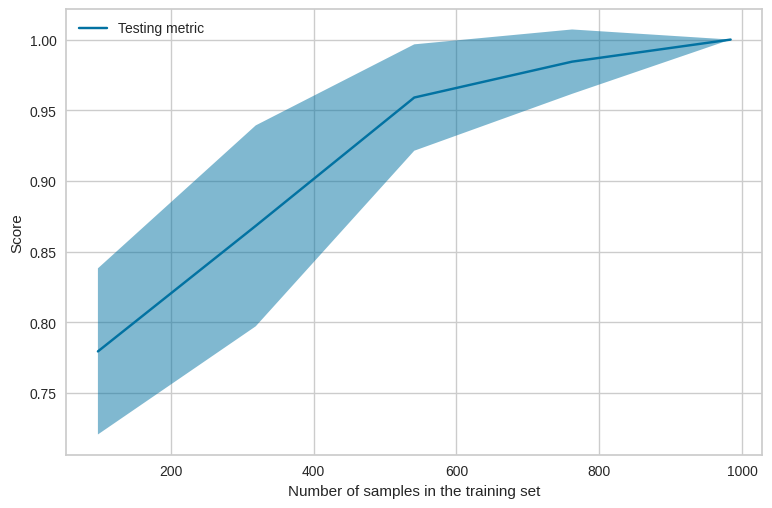

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.tree import DecisionTreeClassifier

X, y = data.drop('target', axis=1), data['target']

tree = DecisionTreeClassifier(random_state=32)
train_sizes, train_scores, test_scores = learning_curve(
    tree, X, y, cv=25)
display = LearningCurveDisplay(train_sizes=train_sizes,
      train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()


##Dari tabel tersebut kita dapat mengamati hal-hal berikut:

-Metrik pengujian adalah keakuratan
-Jumlah sampel dalam set pelatihan berkisar antara 200 hingga 1
-Untuk setiap ukuran set pelatihan, model dilatih dan dievaluasi beberapa kali

Dari tabel tersebut, kita dapat melihat bahwa seiring dengan bertambahnya jumlah sampel dalam set pelatihan, skor dan metrik pengujian keduanya meningkat. Hal ini menunjukkan bahwa model tersebut meningkatkan kemampuannya untuk menyesuaikan data pelatihan dan menggeneralisasi data baru.

Namun, saya juga dapat mengamati bahwa metrik pengujian secara konsisten lebih rendah dibandingkan skor untuk semua ukuran set pelatihan. Hal ini menunjukkan bahwa model tersebut melakukan overfitting pada data pelatihan, artinya model tersebut memiliki performa yang baik pada data pelatihan.

Singkatnya, visualisasi kurva pembelajaran menunjukkan bahwa model tersebut melakukan overfitting pada data pelatihan.

# Implementasi Bootstrap

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = data.drop('target', axis=1), data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Implement Bootstrapping
n_bootstraps = 10
bootstrapped_scores = []

for _ in range(n_bootstraps):
    bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]

    clf.fit(X_bootstrap, y_bootstrap)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bootstrapped_scores.append(acc)

    # Print the result
    print("Bootstrapped Scores:", bootstrapped_scores)
    print("Average Bootstrapped Score:", np.mean(bootstrapped_scores))


Bootstrapped Scores: [0.9609756097560975]
Average Bootstrapped Score: 0.9609756097560975
Bootstrapped Scores: [0.9609756097560975, 0.9219512195121952]
Average Bootstrapped Score: 0.9414634146341463
Bootstrapped Scores: [0.9609756097560975, 0.9219512195121952, 0.975609756097561]
Average Bootstrapped Score: 0.9528455284552845
Bootstrapped Scores: [0.9609756097560975, 0.9219512195121952, 0.975609756097561, 0.926829268292683]
Average Bootstrapped Score: 0.9463414634146341
Bootstrapped Scores: [0.9609756097560975, 0.9219512195121952, 0.975609756097561, 0.926829268292683, 0.9707317073170731]
Average Bootstrapped Score: 0.9512195121951219
Bootstrapped Scores: [0.9609756097560975, 0.9219512195121952, 0.975609756097561, 0.926829268292683, 0.9707317073170731, 0.9560975609756097]
Average Bootstrapped Score: 0.9520325203252032
Bootstrapped Scores: [0.9609756097560975, 0.9219512195121952, 0.975609756097561, 0.926829268292683, 0.9707317073170731, 0.9560975609756097, 0.9512195121951219]
Average Boots

# Hyperparameter Tuning Decision Tree

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = data.drop('target', axis=1), data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

clf_max_depth = DecisionTreeClassifier(max_depth=2, random_state=0)
clf_max_depth.fit(X_train, y_train)
score_max_depth = clf_max_depth.score(X_test, y_test)

print("Score default:")
print(score)
print("Score max depth:")
print(score_max_depth)


Score default:
0.9853658536585366
Score max depth:
0.6780487804878049


# Accuracy and Loss Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate loss (using log loss)
y_pred_prob = clf.predict_proba(X_test)
loss = log_loss(y_test, y_pred_prob)
print("Log Loss:", loss)


Accuracy: 0.9853658536585366
Log Loss: 0.5274680983773244


# Confusion Matrix implementation

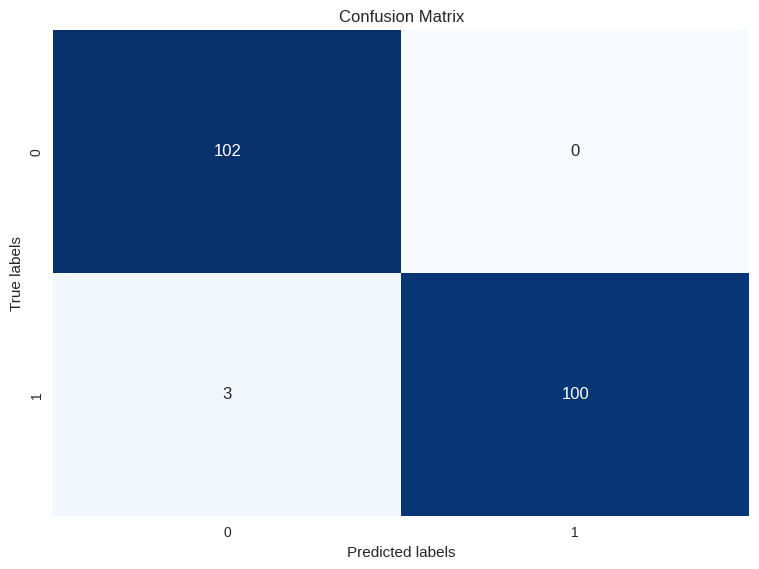

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


##memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9.

matriks confusion diatas menunjukkan , yaitu tabel yang merangkum performa model klasifikasi dengan membandingkan label yang diprediksi dengan label sebenarnya.

Matriks konfusi memiliki dua baris dan dua kolom, masing-masing mewakili label sebenarnya dan label prediksi. Elemen diagonal matriks mewakili jumlah prediksi yang benar, sedangkan elemen di luar diagonal mewakili jumlah prediksi yang salah.

Dalam contoh ini, matriks konfusi menunjukkan bahwa pengklasifikasi memprediksi dengan benar 100 kejadian kelas 0 dan 1 kejadian kelas 1, dengan total 101 prediksi yang benar. Namun, pengklasifikasi juga salah memperkirakan 3 kejadian kelas 0 sebagai kelas 1, dan 0 kejadian kelas 1 sebagai kelas 0.


-Alasan pemilihan metric yang dipilih pada poin 9:

Pilihan metrik evaluasi bergantung pada masalah spesifik dan tujuan model. Dalam hal ini, matriks konfusi dipilih karena memberikan informasi rinci tentang jenis kesalahan yang dibuat model.

Singkatnya, matriks konfusi adalah metrik evaluasi yang berguna untuk model klasifikasi karena memberikan informasi rinci tentang jenis kesalahan yang dibuat model.